In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize']=(3,2)

In [13]:
X=np.arange(0.0,5.0,0.1)

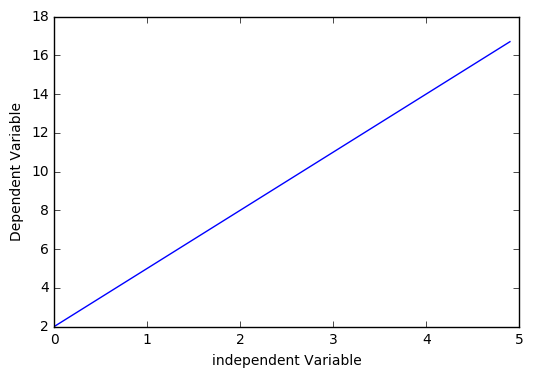

In [14]:
a=3
b=2
Y=a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('independent Variable')
plt.show()

In [15]:
x_data = np.random.rand(100).astype(np.float32)

In [16]:
y_data=x_data*3+2
y_data=np.vectorize(lambda y: y+np.random.normal(loc=0.0,scale=0.1))(y_data)

In [17]:
zip(x_data,y_data)[0:5]

[(0.59292334, 3.9169093372330188),
 (0.5502916, 3.7617082581809824),
 (0.67033011, 4.046992376977423),
 (0.50952822, 3.5513658738086447),
 (0.16169496, 2.4625185593604502)]

In [18]:
a=tf.Variable(1.0)
b=tf.Variable(1.0)
y=a*x_data+b
loss=tf.reduce_mean(tf.square(y-y_data))

In [19]:
optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

In [20]:
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)

In [21]:
train_data=[]
for step in range(100):
    evals=sess.run([train,a,b])[1:]
    if step%10==0:
        print (step,evals)
        train_data.append(evals)

(0, [1.0, 1.0])
(10, [2.2845285, 2.3585815])
(20, [2.592443, 2.2147768])
(30, [2.7701132, 2.1317995])
(40, [2.8726308, 2.0839207])
(50, [2.9317849, 2.0562942])
(60, [2.9659171, 2.0403533])
(70, [2.9856119, 2.0311553])
(80, [2.9969759, 2.0258479])
(90, [3.0035331, 2.0227857])


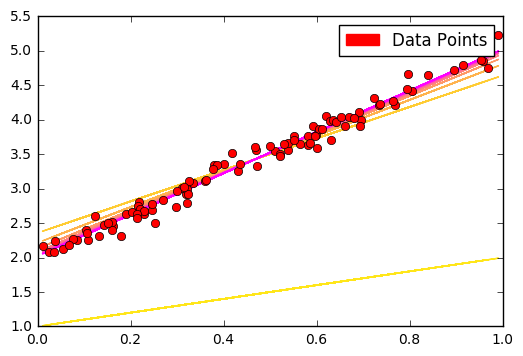

In [22]:
converter=plt.colors
cr,cg,cb =(1.0,1.0,0.0)
for f in train_data:
    cb+=1.0/len(train_data)
    cg-=1.0/len(train_data)
    if cb>1.0: cb=1.0
    if cg<0.0: cb=0.0
    [a,b]=f
    f_y = np.vectorize(lambda x:a*x+b)(x_data)
    line=plt.plot(x_data,f_y)
    plt.setp(line,color=(cr,cg,cb))
plt.plot(x_data,y_data,'ro')
green_line=mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()